In [11]:
import os
import cv2
import numpy as np
import pandas as pd

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

# ingnore warning
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [12]:
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib

print(sys.version)
print('-'*50)
!python --version
print('-'*50)
print('tensorflow:{}'.format(keras.__version__))
print('-'*50)
print("Num GPUs Available:",len(tf.config.experimental.list_physical_devices('GPU')))
for i in tf.config.list_physical_devices('GPU'):
    print(i)   
for i in device_lib.list_local_devices()[-len(tf.config.experimental.list_physical_devices('GPU')):]:
    print('-'*50)
    print(i)

3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 21:14:29) 
[GCC 7.3.0]
--------------------------------------------------
Python 3.6.10 :: Anaconda, Inc.
--------------------------------------------------
tensorflow:2.2.4-tf
--------------------------------------------------
Num GPUs Available: 3
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')
PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU')
--------------------------------------------------
name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 543031296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1743543301350191840
physical_device_desc: "device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:00:05.0, compute capability: 7.0"

--------------------------------------------------
name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 31431059047
locality {
  bus_id: 1
  links {
    link {
      device_id: 2
      type: "StreamExecut

In [5]:
df = pd.read_csv('./data/clustering2.csv', encoding='utf-8', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51260 entries, 0 to 51259
Columns: 2051 entries, filename to center_distance
dtypes: float64(2049), int64(1), object(1)
memory usage: 802.5+ MB


In [7]:
df.head()

,filename,0,1,2,3,4,5,6,7,8,...,2040,2041,2042,2043,2044,2045,2046,2047,cluster,center_distance
0,0.jpg,0.538921,0.277842,0.211032,0.688597,0.185452,0.011790,0.730540,1.207996,0.353460,...,0.161039,0.020428,0.108557,0.375065,0.752277,0.228633,0.100316,0.238573,0,12.912765
1,1.jpg,0.034592,0.369639,0.285800,0.384725,0.161416,0.087499,0.072539,0.054384,0.099075,...,0.417268,0.411512,0.309312,0.799908,0.390913,0.036137,0.323454,0.408953,4,11.271339
2,10.jpg,0.327455,0.172024,0.471271,0.691185,0.073252,0.192843,0.303251,0.252891,0.429027,...,0.111094,0.906809,0.254723,1.594207,1.123552,0.449776,0.011376,0.476048,0,14.281709
3,100.jpg,0.455779,0.937296,1.336042,0.189010,0.308206,0.088695,0.333553,0.254512,0.093298,...,0.881172,1.004324,0.065228,0.354559,0.178113,0.522083,0.709399,0.235006,0,10.513697
4,1000.jpeg,0.158576,0.593128,0.319609,0.634666,0.258412,0.307201,0.383449,1.362908,0.106569,...,0.323253,1.327696,0.239198,0.122088,1.716506,0.229803,1.230238,0.292252,2,14.737880


In [8]:
cluster = df[df['cluster']==0].sort_values(by='center_distance')[:50]
cluster = cluster.reset_index()
cluster.head()

,index,filename,0,1,2,3,4,5,6,7,...,2040,2041,2042,2043,2044,2045,2046,2047,cluster,center_distance
0,33621,4698.jpg,0.388170,0.511069,0.478106,0.222304,0.050888,0.014675,0.121675,0.234698,...,0.216632,0.963909,0.262187,0.005207,0.151305,0.078821,1.279926,0.194357,0,8.148360
1,907,112.jpg,0.715823,0.728997,0.834660,0.296206,0.010789,0.025603,0.097706,0.553076,...,0.151018,1.095921,0.248371,0.147162,0.146199,0.121087,1.343254,0.069224,0,8.261053
2,35973,49373.jpg,0.367187,0.275056,0.293703,0.435456,0.036290,0.008185,0.035705,0.285014,...,0.726770,0.031551,0.372423,0.093734,0.506142,0.134226,0.702346,0.164834,0,8.322972
3,11484,23736.jpg,0.630184,0.720056,0.658088,0.257971,0.048976,0.018547,0.075067,0.376337,...,0.534592,0.308802,0.002427,0.135886,0.121624,0.216119,0.589280,0.136391,0,8.364428
4,35509,4887.jpg,0.177084,0.184123,0.261634,0.361686,0.085169,0.013213,0.064441,0.484579,...,0.595143,0.096606,0.136661,0.316019,0.120966,0.067523,0.543190,0.010597,0,8.435651


(-0.5, 223.5, 223.5, -0.5)

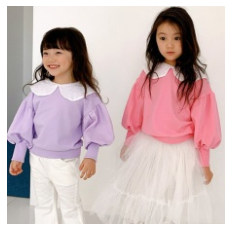

In [9]:
path = './data/2_15_crop'
file = path + '/' + cluster['filename'][0]
src = cv2.imread(file, cv2.IMREAD_COLOR)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)
plt.axis('off')

In [17]:
df.tail()

,filename,0,1,2,3,4,5,6,7,8,...,2040,2041,2042,2043,2044,2045,2046,2047,cluster,center_distance
51255,9995.jpg,0.293623,0.264528,0.172952,0.987640,0.956997,0.365498,0.189777,0.045876,0.452399,...,0.217940,0.063807,0.954645,0.605879,0.205194,0.267348,0.436284,0.325698,3,12.011737
51256,9996.jpg,0.069204,0.517356,0.113677,0.522252,0.112653,0.059658,0.102800,0.146524,0.725369,...,0.428880,0.067112,0.325104,0.831683,0.003369,0.230388,0.089892,1.389998,1,9.481769
51257,9997.jpg,0.052321,0.920149,0.803330,0.571406,0.381756,0.220391,0.449646,0.002174,0.245070,...,0.183943,0.712639,0.406819,0.209566,0.478736,0.219497,0.280532,0.134853,4,15.664304
51258,9998.jpg,0.240270,0.135827,0.251528,0.543418,0.299809,0.118467,0.338664,0.371227,0.116780,...,0.091395,0.321492,0.816615,0.398965,0.016267,0.003002,0.135119,0.010454,3,12.021043
51259,9999.jpg,0.027071,0.086001,0.191932,1.191236,0.458962,0.242137,0.516381,0.111286,0.446790,...,0.526054,0.006622,0.512935,1.308728,0.241396,0.417742,0.089119,1.084172,1,14.077037


In [25]:
df['cluster'].value_counts()

3    12155
2    11752
4     9528
0     9489
1     8336
Name: cluster, dtype: int64

In [35]:
df0 = df[df['cluster'] == 0].sample(n=1000) # 비복원 추출
df1 = df[df['cluster'] == 1].sample(n=1000)
df2 = df[df['cluster'] == 2].sample(n=1000)
df3 = df[df['cluster'] == 3].sample(n=1000)
df4 = df[df['cluster'] == 4].sample(n=1000)

In [38]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 29991 to 28507
Columns: 2051 entries, filename to center_distance
dtypes: float64(2049), int64(1), object(1)
memory usage: 15.7+ MB


In [48]:
df0['filename'].values[:5]

array(['43442.jpg', '32614.jpg', '56591.jpg', '17331.jpg', '44105.jpg'],
      dtype=object)

In [49]:
os.listdir(path)[:5]

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpeg']

In [68]:
X = []
y = []

#path = 'C:/Users/sanghui/Desktop/toyproject/DL_Project_5/hsh/data/2_15_crop'

# 0번 추출
for idx, df in enumerate([df0, df1, df2, df3, df4]):
    for file in tqdm_notebook(df['filename'].values):
    #for file in os.listdir(path):
        file_path = path + '/' + file
        src = cv2.imread(file_path, cv2.IMREAD_COLOR)
        dst = cv2.resize(src, dsize=(299, 299), interpolation=cv2.INTER_CUBIC)
        X.append(dst) # image
        y.append(df['cluster'].values[idx]) # label

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [86]:
print('num of cluster 0: {}'.format(y.count(0)))
print('num of cluster 1: {}'.format(y.count(1)))
print('num of cluster 2: {}'.format(y.count(2)))
print('num of cluster 3: {}'.format(y.count(3)))
print('num of cluster 4: {}'.format(y.count(4)))

num of cluster 0: 1000
num of cluster 1: 1000
num of cluster 2: 1000
num of cluster 3: 1000
num of cluster 4: 1000


In [87]:
X = np.array(X)
y = np.array(y)

In [88]:
X.shape, y.shape

((5000, 299, 299, 3), (5000,))

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

In [90]:
%%time
tmp_train, tmp_test = X_train/255.0, X_test/255.0

CPU times: user 2.62 s, sys: 5.19 s, total: 7.81 s
Wall time: 7.79 s


In [91]:
input_shape = (299, 299, 3)

base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dropout(0.5))
add_model.add(Dense(5, activation='softmax'))

model = add_model

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [93]:
%%time

#hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32, verbose=1)
hist = model.fit(tmp_train, y_train, validation_data=(tmp_test, y_test), epochs=10, batch_size=32, verbose=1)

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 20s 5ms/sample - loss: 1.2145 - accuracy: 0.5017 - val_loss: 1.2372 - val_accuracy: 0.5330
Epoch 2/10
4000/4000 [==============================] - 10s 3ms/sample - loss: 0.8544 - accuracy: 0.6722 - val_loss: 1.6070 - val_accuracy: 0.5000
Epoch 3/10
4000/4000 [==============================] - 10s 3ms/sample - loss: 0.7711 - accuracy: 0.6967 - val_loss: 1.5414 - val_accuracy: 0.5470
Epoch 4/10
4000/4000 [==============================] - 10s 3ms/sample - loss: 0.7565 - accuracy: 0.6967 - val_loss: 2.0517 - val_accuracy: 0.4850
Epoch 5/10
4000/4000 [==============================] - 10s 3ms/sample - loss: 0.7228 - accuracy: 0.7160 - val_loss: 1.7540 - val_accuracy: 0.5510
Epoch 6/10
4000/4000 [==============================] - 10s 3ms/sample - loss: 0.6982 - accuracy: 0.7312 - val_loss: 2.0608 - val_accuracy: 0.5010
Epoch 7/10
4000/4000 [==============================] - 10s 3ms/sample

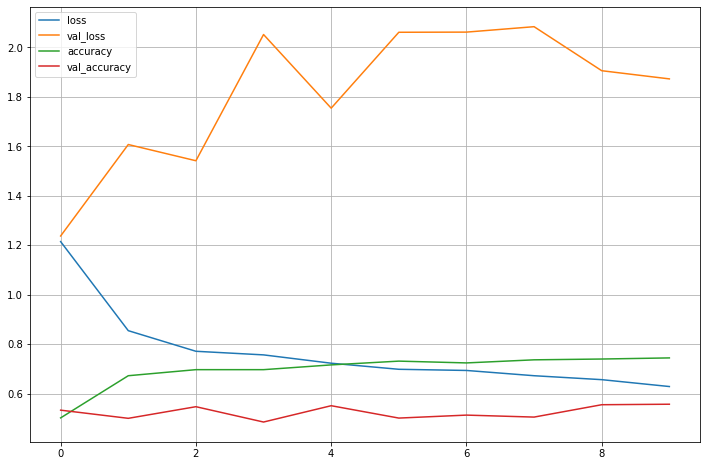

In [94]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [84]:
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, losses, activations, models
from tensorflow.keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import applications
from keras.applications.inception_v3 import preprocess_input

# 경량화 모델

In [96]:
# CNN 모델 생성

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', input_shape=(229,229,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    
    layers.Dense(1000, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.summary()

ResourceExhaustedError: OOM when allocating tensor with shape[207936,1000] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [ ]:
%%time

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=10, verbose=1,
                validation_data=(X_test, y_test))